In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")

# Описание задачи

https://www.kaggle.com/competitions/brist1d


**Цель:** прогнозирование уровня глюкозы в крови на час вперед с использованием данных участников за предыдущие шесть часов.

**Данные:**
Набор данных взят из исследования, в котором участвовали молодые люди в Великобритании с диабетом 1 типа, использовавшие непрерывный монитор глюкозы (CGM), инсулиновую помпу и смарт-часы. Эти устройства собирали показания уровня глюкозы в крови, дозировку инсулина, потребление углеводов, и данные об активности. Собранные данные были аггрегированы в пятиминутные интервалы и поделены на сэмплы. Каждый сэмпл представляет собой точку во времени и содержит аггрегированные пятиминутные интервалы из предыдущих шести часов. Цель состоит в том, чтобы предсказать уровень глюкозы в крови на час вперед для каждого сэмпла.

В задаче используются данные от девяти пациентов-участников исследования. Сэмплы расположены в хронологическом порядке и перекрываются.

Target - bg+1:00 - показатель уровня глюкозы в крови в ммоль/л через час в будущем

- id - идентификатор сэмпла (уникальный идентификатор строки)
- p_num - номер участника исследования
- time - время суток в формате ЧЧ:ММ:СС
- bg-X:XX - показатель уровня глюкозы в крови в ммоль/л, за X:XX(Ч:MM) в прошлом (например, bg-2:35 это уровень глюкозы в крови за 2 часа и 35 минут до значения времени для этой строки), записанный непрерывным монитором глюкозы
- insulin-X:XX — общая доза инсулина, полученная в единицах(units) за последние 5 минут, за X:XX(H:MM) в прошлом (например, insulin-2:35 будет общей дозой инсулина, полученной между 2 часами 40 минутами и 2 часами 35 минутами до значения времени для этой строки), записанная инсулиновой помпой
- carbs-X:XX - 	общее количество углеводов, потребленных в граммах за последние 5 минут, X:XX(H:MM) - время в прошлом (например, carbs-2:35, будет общим количеством углеводов, потребленных между 2 часами 40 минутами и 2 часами 35 минутами до значения времени для этой строки), записанное участником
- hr-X:XX - средняя частота сердечных сокращений в ударах в минуту за последние 5 минут, X:XX(H:MM) - время в прошлом (например, hr-2:35, будет средней частотой сердечных сокращений между 2 часами 40 минутами и 2 часами 35 минутами до значения времени для этой строки), записанная смарт-часами
- steps-X:XX - общее количество пройденных шагов за последние 5 минут, X:XX(H:MM) - время в прошлом (например, steps-2:35, будет общим количеством пройденных шагов между 2 часами 40 минутами и 2 часами 35 минутами до значения времени для этой строки), записанное смарт-часами 	
- cals-X:XX - общее количество сожженных калорий за последние 5 минут, X:XX(H:MM) - время в прошлом (например, cals-2:35, будет означать общее количество сожженных калорий между 2 часами 40 минутами и 2 часами 35 минутами до значения времени для этой строки), рассчитанное смарт-часами
- activity-X:XX - самостоятельно заявленная активность, выполненная за последние 5 минут, X:XX(H:MM) - время в прошлом (например, activity-2:35 будет содержать строковое название активности, выполненной между 2 часами 40 минутами и 2 часами 35 минутами до значения времени для этой строки), установлена на смарт-часах

# EDA

In [57]:
df = pd.read_csv('./data/whole_data.csv')
df.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [13]:
df.shape

(177024, 508)

In [14]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177024 entries, 0 to 177023
Data columns (total 508 columns):
 #    Column         Dtype  
---   ------         -----  
 0    id             object 
 1    p_num          object 
 2    time           object 
 3    bg-5:55        float64
 4    bg-5:50        float64
 5    bg-5:45        float64
 6    bg-5:40        float64
 7    bg-5:35        float64
 8    bg-5:30        float64
 9    bg-5:25        float64
 10   bg-5:20        float64
 11   bg-5:15        float64
 12   bg-5:10        float64
 13   bg-5:05        float64
 14   bg-5:00        float64
 15   bg-4:55        float64
 16   bg-4:50        float64
 17   bg-4:45        float64
 18   bg-4:40        float64
 19   bg-4:35        float64
 20   bg-4:30        float64
 21   bg-4:25        float64
 22   bg-4:20        float64
 23   bg-4:15        float64
 24   bg-4:10        float64
 25   bg-4:05        float64
 26   bg-4:00        float64
 27   bg-3:55        float64
 28   bg-3:50     

In [15]:
df['p_num'].value_counts()

p_num
p03    26028
p02    25872
p10    25454
p12    25299
p04    24686
p11    24555
p01     8459
p06     8383
p05     8288
Name: count, dtype: int64

Посмотрим на то, как ведет себя целевая переменная для разных пациентов:

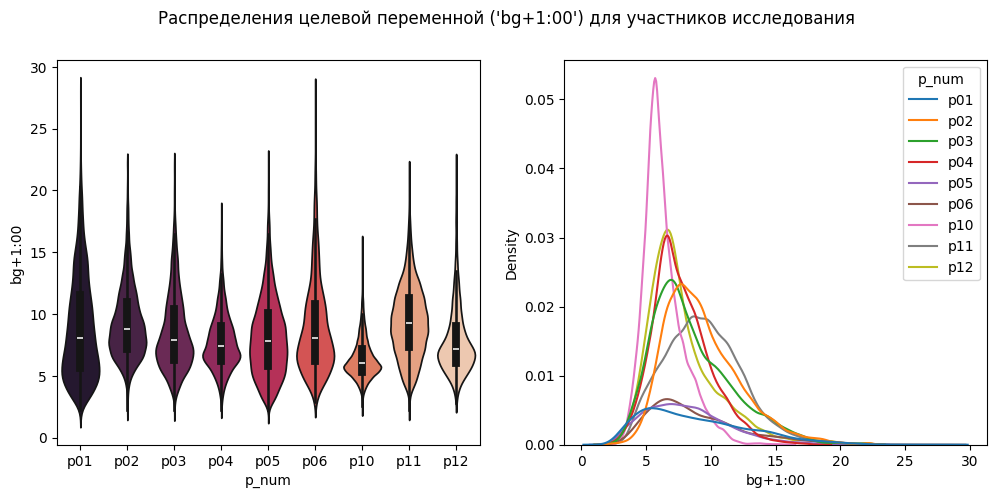

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.violinplot(df,
               y='bg+1:00',
               x='p_num',
               hue='p_num',
               legend=False,
               palette='rocket',
               ax=axes[0])
sns.kdeplot(df, x='bg+1:00', hue='p_num', ax=axes[1])
plt.suptitle(
    "Распределения целевой переменной ('bg+1:00') для участников исследования")
plt.show()

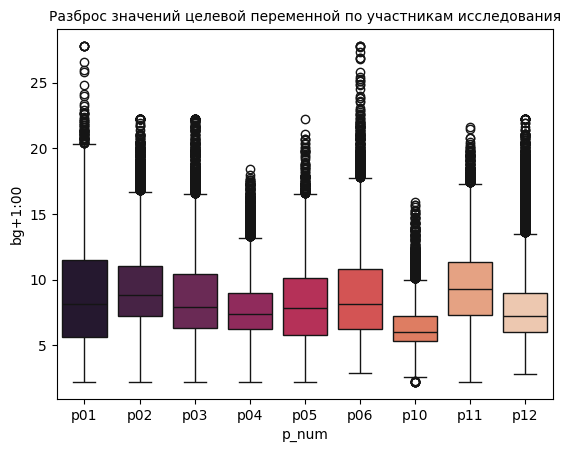

In [17]:
plt.figure()
sns.boxplot(df, y='bg+1:00', x='p_num', palette='rocket')
plt.xticks(ticks=np.unique(df.p_num))
plt.title('Разброс значений целевой переменной по участникам исследования', fontsize=10);

Распределения целевой переменной по пациентам сильно различаются, что отражает индивидуальные физиологические особенности и особенности образа жизни каждого участника. Также в значениях целевой переменной много выбросов (которые удалять нельзя, так как скачки уровня глюкозы - это нормальная ситуация для диабетиков), так что лучше в качестве метрики ориентироваться на MAE, а не на MSE и ее производные. 

**Feature Engineering**

Выделим из признака time признак hour (признак может оказаться значимым, так как отражает циркадные биоритмы) и удалим признак time:

In [18]:
import datetime as dt

df['time'] = pd.to_datetime(df['time'], format='%X')
df['hour'] = df['time'].dt.round('H').dt.hour
df.drop('time', axis=1, inplace=True)

Посмотрим, как в разрезе признака hour ведет себя целевая переменная:

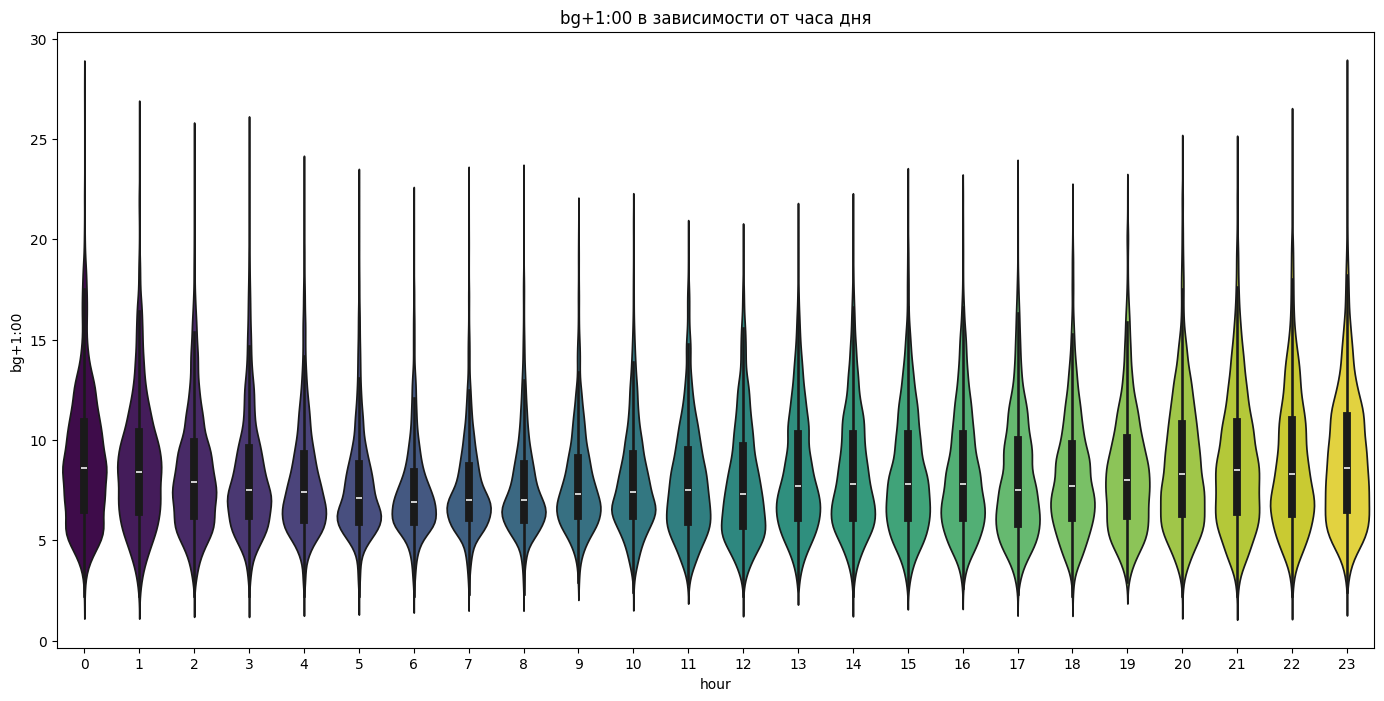

In [19]:
plt.figure(figsize=(17, 8))
sns.violinplot(df,
               x='hour',
               y='bg+1:00',
               hue='hour',
               palette='viridis',
               legend=False)
plt.title('bg+1:00 в зависимости от часа дня');

Медианные значения, разброс и распределения целевой переменной различаются в зависимости от времени суток, что, вероятно, отражает циркадные биоритмы, а также образ жизни участников (например, то, в какое время суток они принимают пищу)

In [20]:
avg_target_by_hour = df.groupby(['p_num',
                                 'hour'])['bg+1:00'].mean().unstack().T

px.line(avg_target_by_hour,
        x=avg_target_by_hour.index,
        y=avg_target_by_hour.columns,
        title='Изменение bg+1:00 в течение дня')

Уровень глюкозы значительно менялся в течение суток у всех пациентов

**Анализ признаков и заполнение пропущенных значений**

In [21]:
df.isna().sum() 
# в данных много пропусков
# в признаке time(и соответственно hour) пропуски отсутствуют

id                    0
p_num                 0
bg-5:55           27254
bg-5:50           18491
bg-5:45           13660
                  ...  
activity-0:10    174287
activity-0:05    174271
activity-0:00    174287
bg+1:00               0
hour                  0
Length: 508, dtype: int64

Посмотрим распределение количества пропусков по колонкам:

In [22]:
bg = [col for col in df.columns if col.startswith('bg')][:-1]
ins = [col for col in df.columns if col.startswith('insulin')]
carb = [col for col in df.columns if col.startswith('carb')]
hr = [col for col in df.columns if col.startswith('hr')]
steps = [col for col in df.columns if col.startswith('steps')]
cals = [col for col in df.columns if col.startswith('cals')]
act = [col for col in df.columns if col.startswith('activity')]

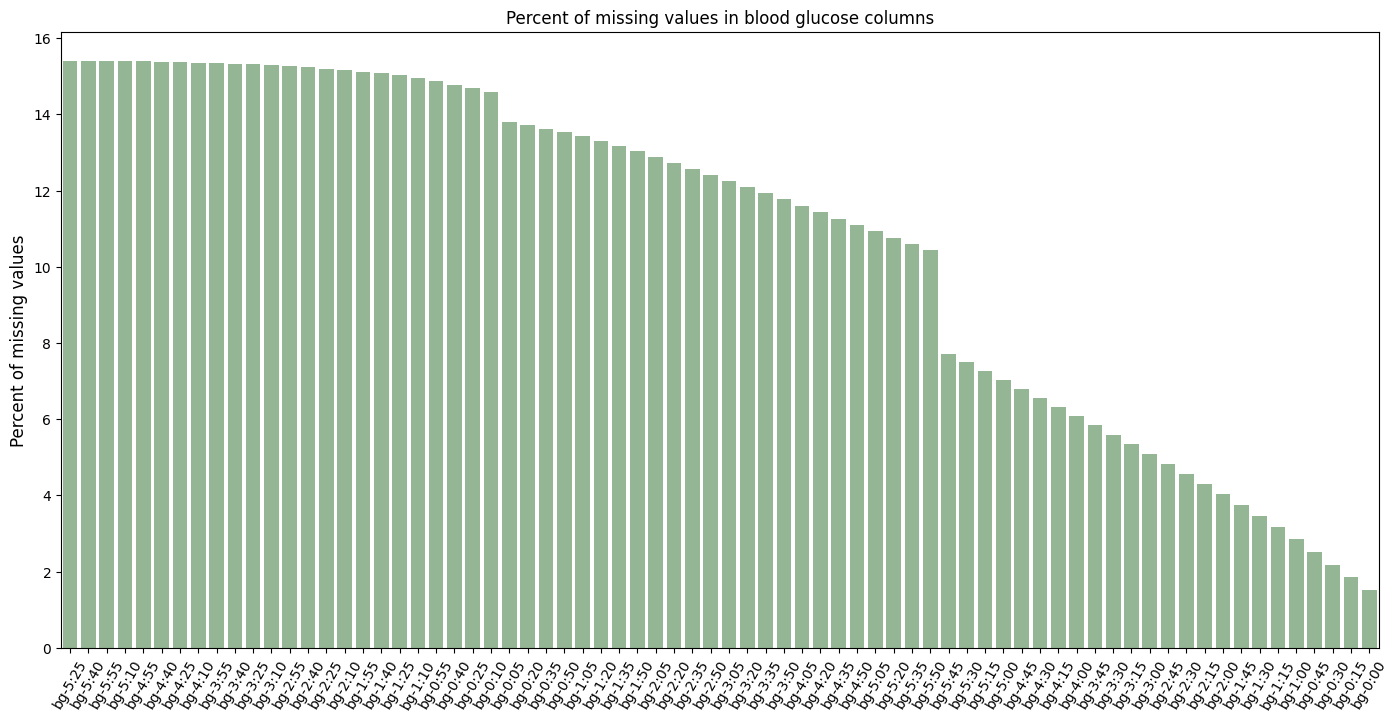

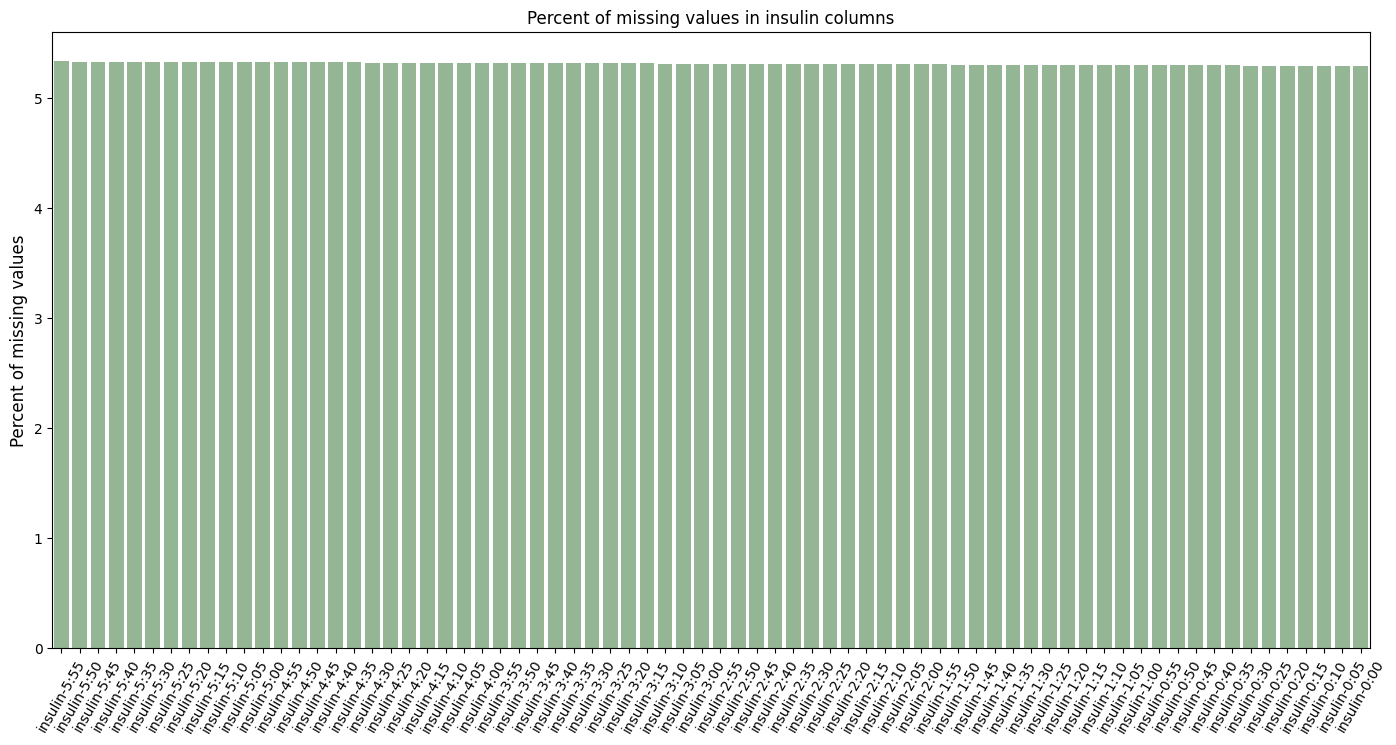

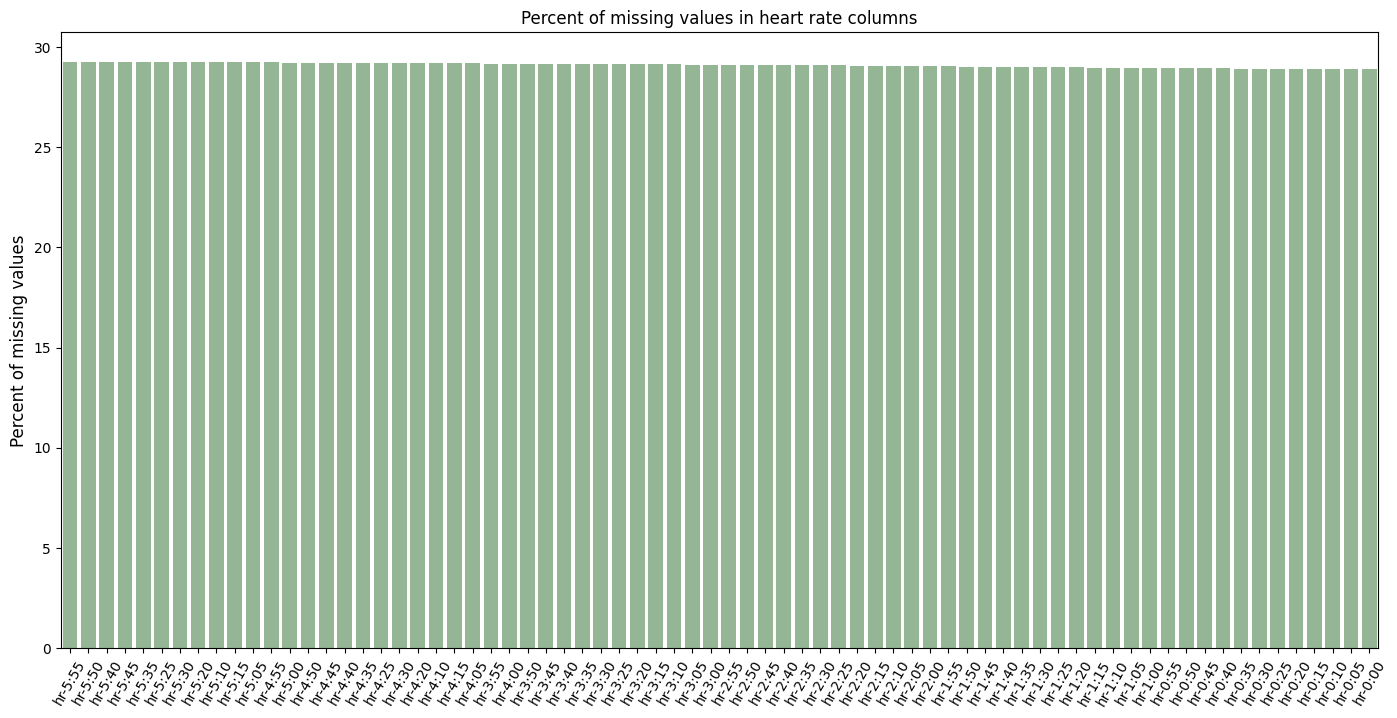

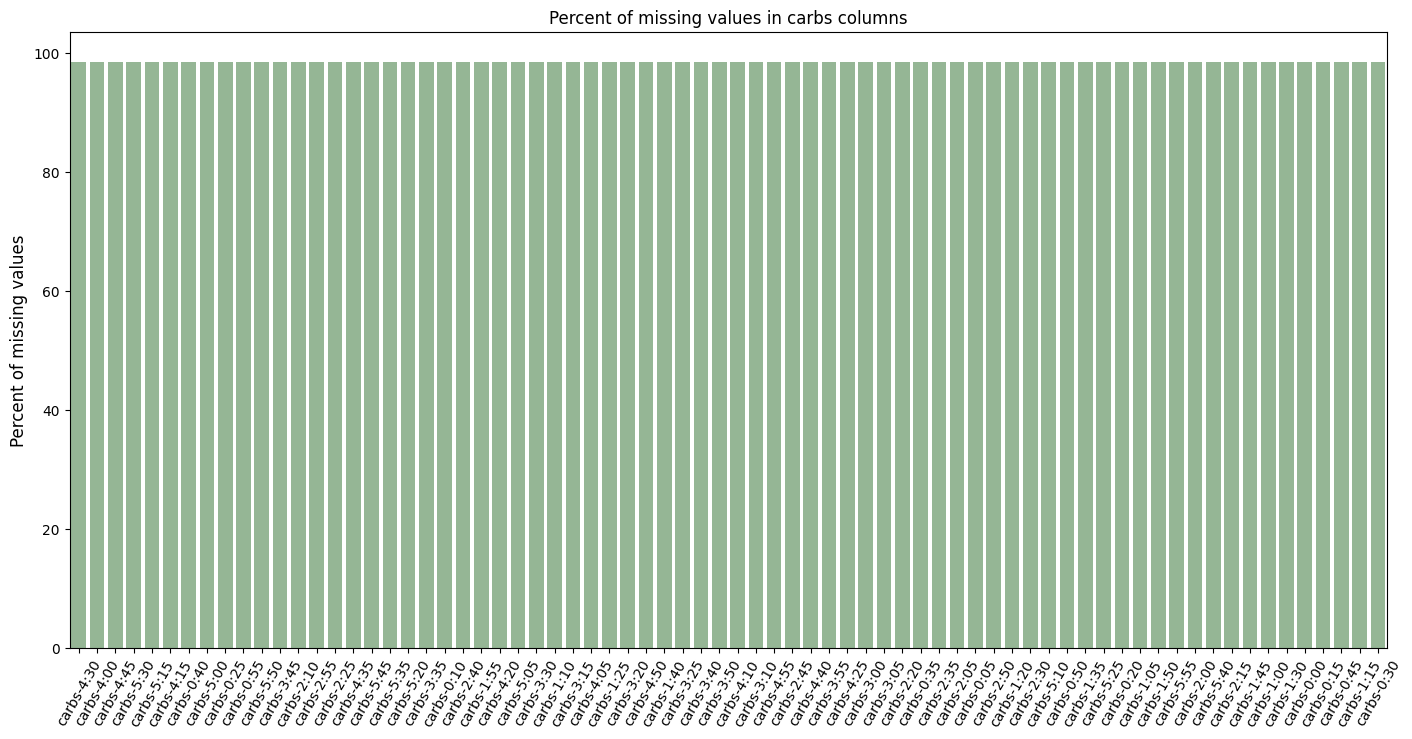

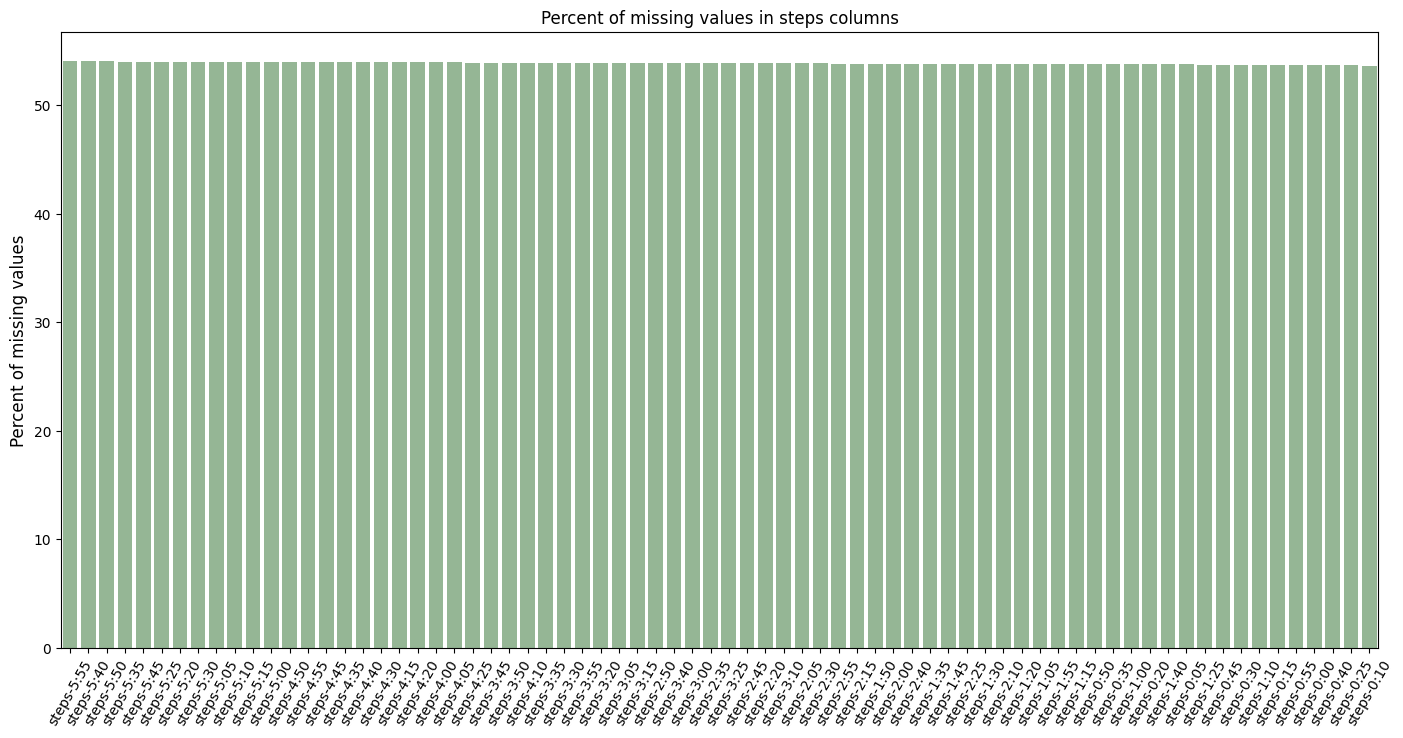

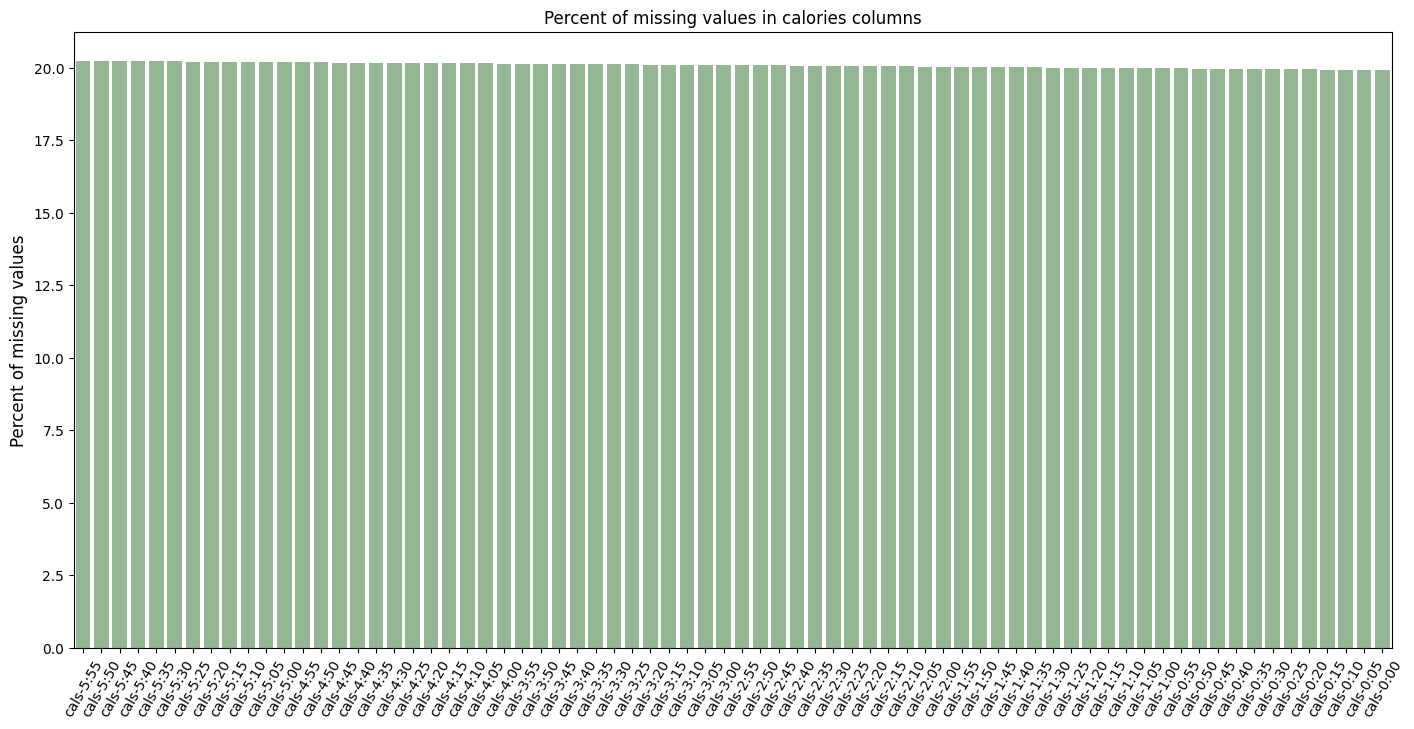

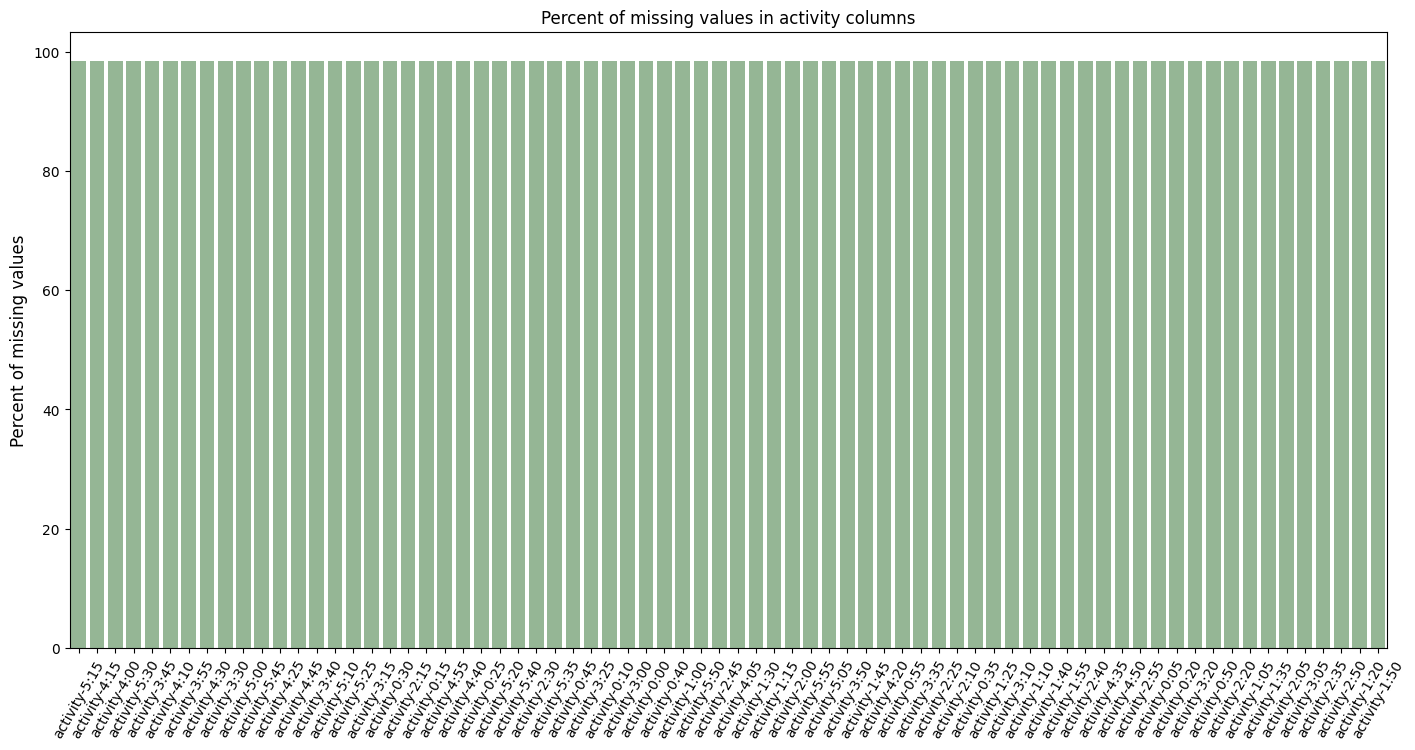

In [23]:
col_types = {
    'blood glucose': bg,
    'insulin': ins,
    'heart rate': hr,
    'carbs': carb,
    'steps': steps,
    'calories': cals,
    'activity': act
}

for name, lst in col_types.items():
    missing = (df[lst].isna().sum() / df[lst].shape[0]).mul(100).sort_values(
        ascending=False).to_frame()
    plt.figure(figsize=(17, 8))
    sns.barplot(data=missing, x=missing.index, y=0, color='darkseagreen')
    plt.xlabel('')
    plt.ylabel('Percent of missing values', fontsize=12)
    plt.title(f"Percent of missing values in {name} columns")
    plt.xticks(rotation=60)

В колонках c activity и carbs почти все значения отсутствуют, поэтому удалим их:

In [24]:
cols_to_drop = []
for col in df.columns:
    if col.startswith('activity') or col.startswith('carbs'):
        cols_to_drop.append(col)

In [25]:
cols_to_drop

['carbs-5:55',
 'carbs-5:50',
 'carbs-5:45',
 'carbs-5:40',
 'carbs-5:35',
 'carbs-5:30',
 'carbs-5:25',
 'carbs-5:20',
 'carbs-5:15',
 'carbs-5:10',
 'carbs-5:05',
 'carbs-5:00',
 'carbs-4:55',
 'carbs-4:50',
 'carbs-4:45',
 'carbs-4:40',
 'carbs-4:35',
 'carbs-4:30',
 'carbs-4:25',
 'carbs-4:20',
 'carbs-4:15',
 'carbs-4:10',
 'carbs-4:05',
 'carbs-4:00',
 'carbs-3:55',
 'carbs-3:50',
 'carbs-3:45',
 'carbs-3:40',
 'carbs-3:35',
 'carbs-3:30',
 'carbs-3:25',
 'carbs-3:20',
 'carbs-3:15',
 'carbs-3:10',
 'carbs-3:05',
 'carbs-3:00',
 'carbs-2:55',
 'carbs-2:50',
 'carbs-2:45',
 'carbs-2:40',
 'carbs-2:35',
 'carbs-2:30',
 'carbs-2:25',
 'carbs-2:20',
 'carbs-2:15',
 'carbs-2:10',
 'carbs-2:05',
 'carbs-2:00',
 'carbs-1:55',
 'carbs-1:50',
 'carbs-1:45',
 'carbs-1:40',
 'carbs-1:35',
 'carbs-1:30',
 'carbs-1:25',
 'carbs-1:20',
 'carbs-1:15',
 'carbs-1:10',
 'carbs-1:05',
 'carbs-1:00',
 'carbs-0:55',
 'carbs-0:50',
 'carbs-0:45',
 'carbs-0:40',
 'carbs-0:35',
 'carbs-0:30',
 'carbs-0:

In [26]:
# создаем копию датафрейма
df_clean = df.copy()

# удаляем ненужные колонки 
df_clean.drop(cols_to_drop, axis=1, inplace=True)
df_clean.shape

(177024, 364)

In [27]:
df_clean.describe()

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00,hour
count,149770.000000,158533.000000,163364.000000,149766.000000,158254.000000,163770.000000,149763.000000,157973.000000,164174.000000,149771.000000,...,141706.000000,141713.000000,141722.000000,141732.000000,141741.000000,141751.000000,141761.000000,141767.000000,177024.000000,177024.000000
mean,8.211018,8.230449,8.253291,8.210988,8.229649,8.254083,8.211049,8.228888,8.254602,8.211000,...,9.364096,9.362525,9.366591,9.368108,9.366998,9.370010,9.372536,9.368960,8.277045,11.453611
std,2.852188,2.913438,2.945594,2.852090,2.911313,2.947651,2.852212,2.909304,2.949689,2.852315,...,8.012681,8.017508,8.018465,8.018349,8.023788,8.021999,8.023280,8.023327,2.996398,6.886226
min,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,...,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,2.200000,0.000000
25%,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,...,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,6.100000,6.000000
50%,7.600000,7.600000,7.700000,7.600000,7.600000,7.700000,7.600000,7.600000,7.700000,7.600000,...,6.180000,6.170000,6.180000,6.180000,6.180000,6.180000,6.180000,6.180000,7.700000,12.000000
75%,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,...,9.060000,9.050000,9.060000,9.060000,9.060000,9.060000,9.070000,9.060000,9.900000,17.000000
max,22.200000,25.100000,27.800000,22.200000,25.100000,27.800000,22.200000,25.100000,27.800000,22.200000,...,116.100000,116.100000,116.100000,116.100000,116.100000,116.100000,116.100000,116.100000,27.800000,23.000000


Посмотрим на распределения каждого типа признаков:

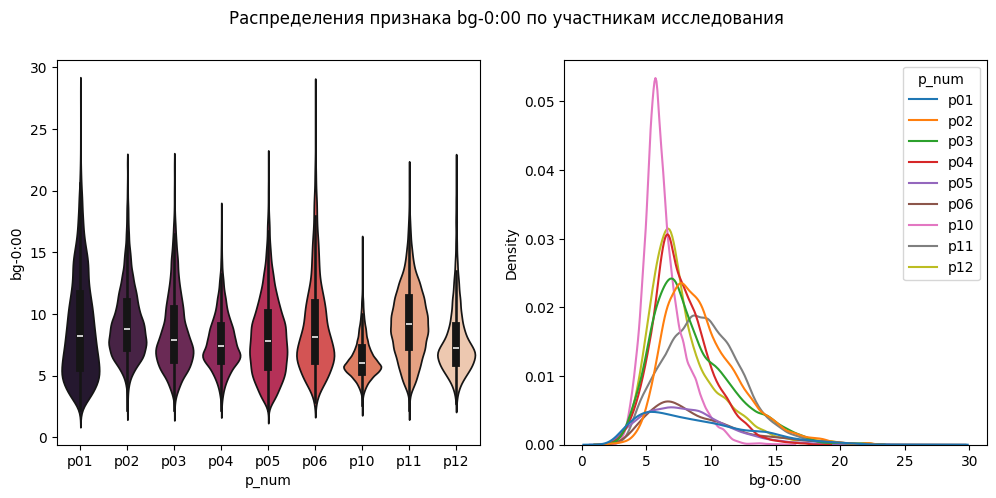

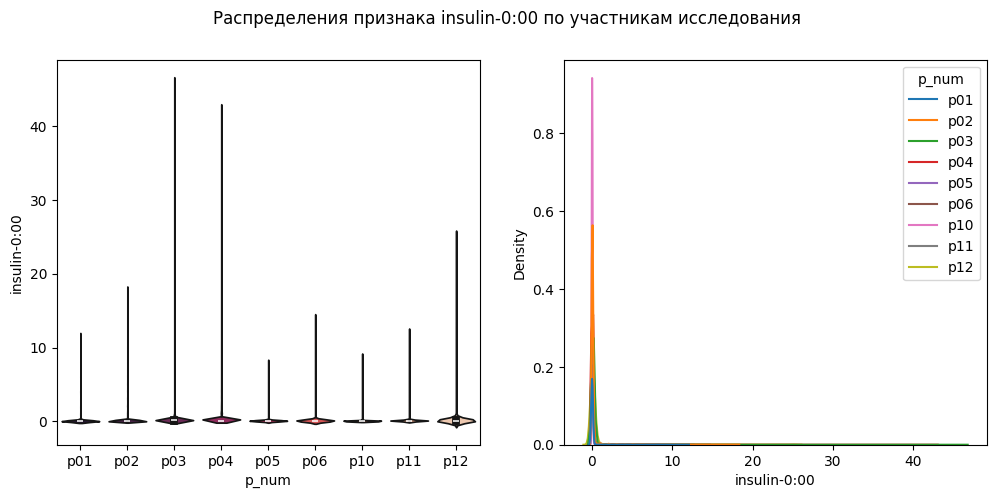

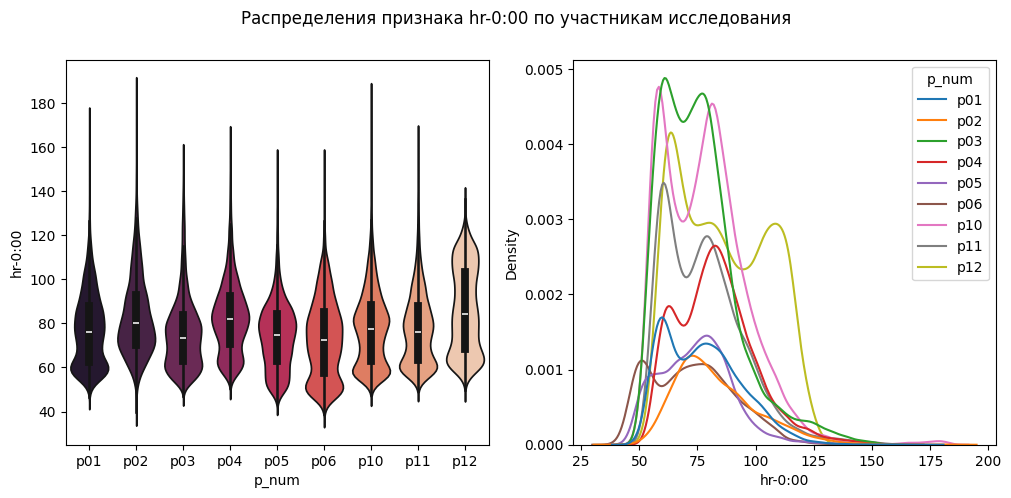

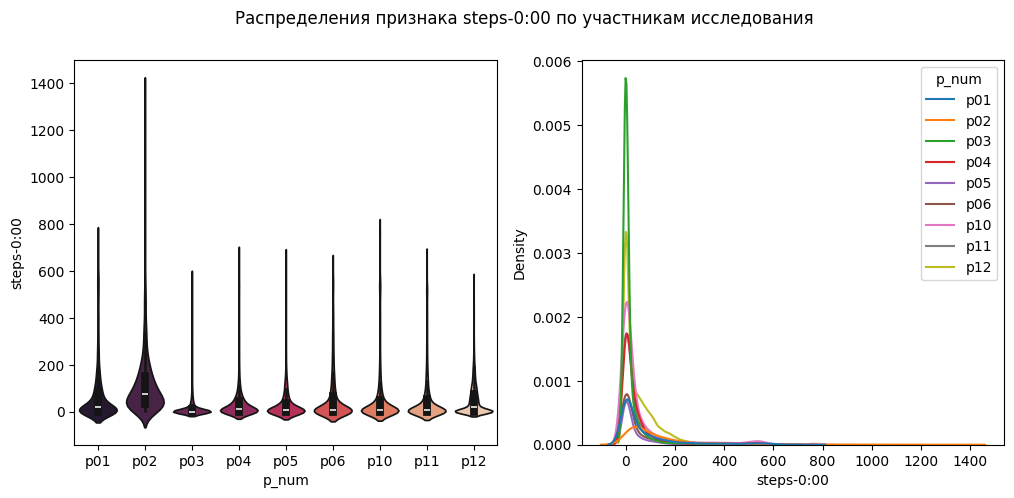

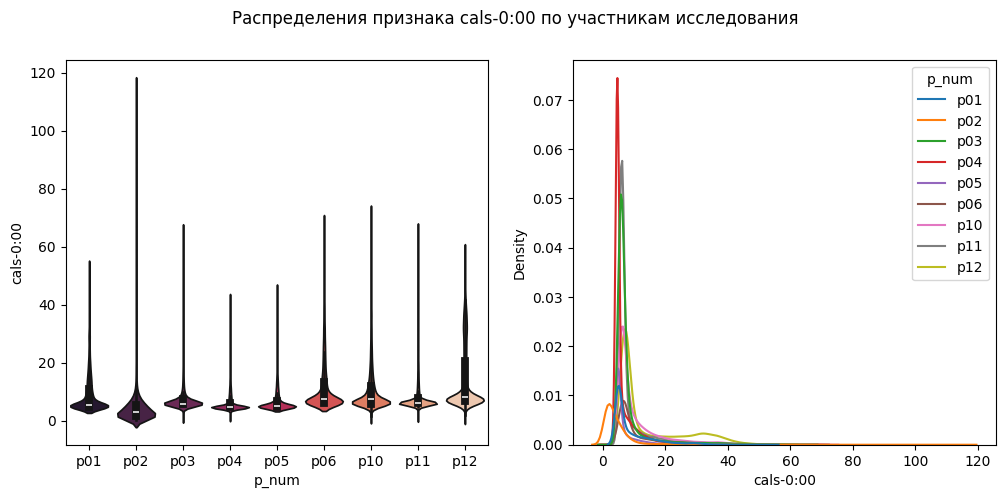

In [28]:
features = ['bg-0:00', 'insulin-0:00', 'hr-0:00', 'steps-0:00', 'cals-0:00']

for feature in features:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    sns.violinplot(df,
                   y=feature,
                   x='p_num',
                   hue='p_num',
                   legend=False,
                   palette='rocket',
                   ax=axes[0])
    sns.kdeplot(df, x=feature, hue='p_num', ax=axes[1])
    plt.suptitle(
        f"Распределения признака {feature} по участникам исследования")
    plt.show()

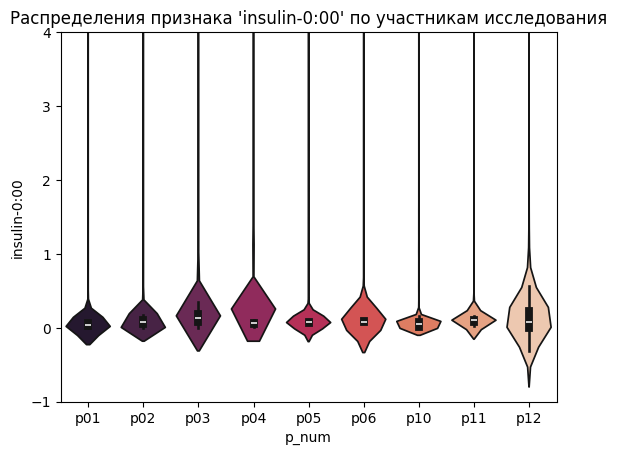

In [29]:
# график для инсулина в другом масштабе
plt.figure()
sns.violinplot(df,
               y='insulin-0:00',
               x='p_num',
               hue='p_num',
               legend=False,
               palette='rocket')
plt.ylim((-1, 4))
plt.title("Распределения признака 'insulin-0:00' по участникам исследования")
plt.show()

Во-первых, во всех типах признаков многие распределения не являются нормальными, поэтому медиана лучше подходит для заполнения пропусков, чем средние значения. \
Во-вторых, распределения сильно отличаются у разных участников, поэтому пропущенные значения логично заполнять, группируя данные именно по участникам, чтобы учесть их индивидуальные особенности. Так как в трейн и тест попадают разные пациенты (причины описаны в ноутбуке с бейзлайнами), заполнение пропусков можно осуществлять до разделения на трейн и тест.

Посмотрим на кусочек временного ряда для каждого типа признаков (для визуализации будем заполнять пропуски не встречающимся в признаке значением) и заполним пропуски для каждого типа признаков:

**Колонки bg**

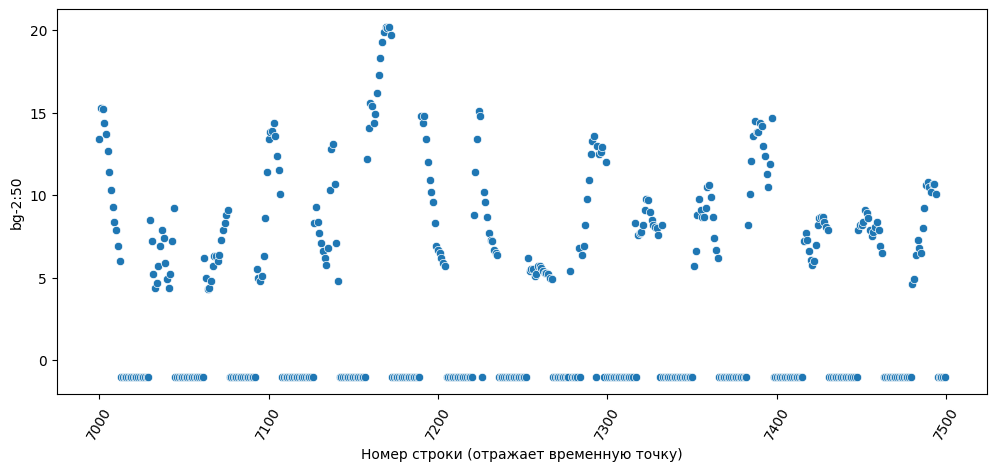

In [30]:
sample_bg = df[['p_num'] + bg][
    df['p_num'] == 'p01']['bg-2:50'].to_frame().fillna(-1).iloc[7000:7500, :]
plt.figure(figsize=(12, 5))
sns.scatterplot(sample_bg, x=sample_bg.index, y='bg-2:50')
plt.xlabel('Номер строки (отражает временную точку)')
plt.xticks(rotation=60);

Видно, что изменения уровня глюкозы идут достаточно непрерывно, что логично:если 5 минут назад уровень глюкозы был низкий, а через 10 минут высокий, то в промежутке уровень рос, и можно аппроксимировать пропущенные промежутки линейными отрезакми(линейная интерполяция). Однако это хорошо работает только для небольших промежутков. Если пропущенных значений много подряд, то допущение уже грубое. Поэтому лучше выставить лимит на линейную аппроксимацию и в длинных промежутках заполнять пропуски медианой по каждому пациенту(в участках временного ряда, в которых после линейной интерполяции осталось не много пропусков подряд, можно заполнять пропуски медианой со скользящим окном, таким образом учитывая локальный контекст, а в тех участках, где все еще много пропусков подряд, медианой по всем значениям для пациента):

In [31]:
df_clean[bg].isna().sum()

bg-5:55    27254
bg-5:50    18491
bg-5:45    13660
bg-5:40    27258
bg-5:35    18770
           ...  
bg-0:20    24281
bg-0:15     3272
bg-0:10    25822
bg-0:05    24438
bg-0:00     2696
Length: 72, dtype: int64

In [32]:
for col in bg:
    df_clean[col] = df_clean.groupby('p_num')[col].transform(
        lambda x: x.fillna(x.interpolate(limit=30, limit_direction='both')))
    df_clean[col] = df_clean.groupby('p_num')[col].transform(
        lambda x: x.fillna(
            x.rolling(window=10, min_periods=1, center=True).median()))
    df_clean[col] = df_clean.groupby('p_num')[col].transform(
        lambda x: x.fillna(x.median()))

In [33]:
df_clean[bg].isna().sum().sum()

0

**Колонки hr**

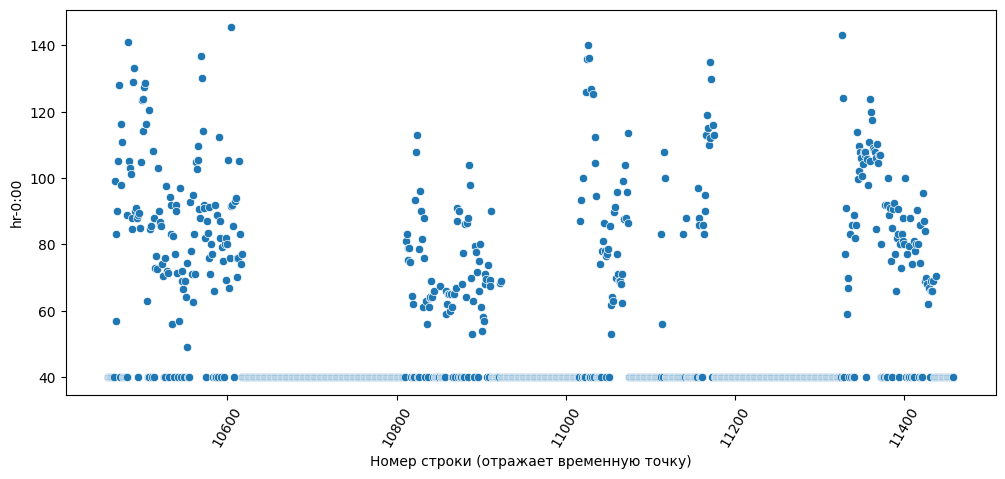

In [34]:
sample_hr = df[['p_num'] + hr][
    df['p_num'] == 'p02']['hr-0:00'].to_frame().fillna(40).iloc[2000:3000, :]
plt.figure(figsize=(12, 5))
sns.scatterplot(sample_hr, x=sample_hr.index, y='hr-0:00')
plt.xlabel('Номер строки (отражает временную точку)')
plt.xticks(rotation=60);

Пропуски в колонках hr не получится заполнить интерполяцией, так как изменения во времени более скачкообразные и рандомные, чем у уровня глюкозы, поэтому лушчше заполнить их медианой(с rolling window, если не много пропусков подряд, то есть если локальный контекст, и просто медианой по каждому пациенту оставшиеся пропуски).

In [35]:
df_clean[hr].isna().sum()

hr-5:55    51819
hr-5:50    51806
hr-5:45    51792
hr-5:40    51805
hr-5:35    51789
           ...  
hr-0:20    51172
hr-0:15    51168
hr-0:10    51156
hr-0:05    51142
hr-0:00    51134
Length: 72, dtype: int64

In [36]:
for col in hr:
    df_clean[col] = df_clean.groupby('p_num')[col].transform(
        lambda x: x.fillna(
            x.rolling(window=10, min_periods=1, center=True).median()))
    df_clean[col] = df_clean.groupby('p_num')[col].transform(
        lambda x: x.fillna(x.median()))

**Колонки steps**

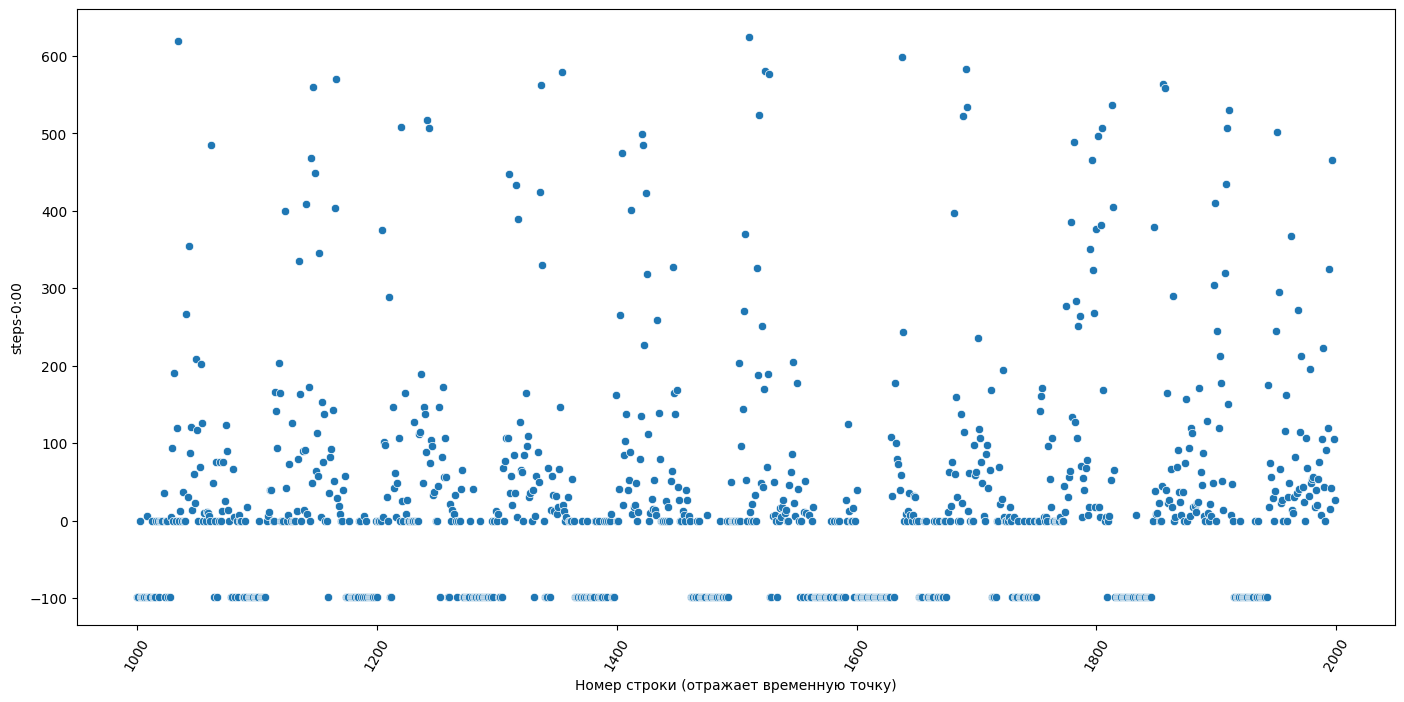

In [37]:
sample_steps = df[['p_num'] +
                  steps][df['p_num'] == 'p01']['steps-0:00'].to_frame().fillna(
                      -99).iloc[1000:2000, :]
plt.figure(figsize=(17, 8))
sns.scatterplot(sample_steps, x=sample_steps.index, y='steps-0:00')
plt.xlabel('Номер строки (отражает временную точку)')
plt.xticks(rotation=60);

Заполняем пропуски аналогично колонкам hr:

In [38]:
df_clean[steps].isna().sum()

steps-5:55    95691
steps-5:50    95663
steps-5:45    95648
steps-5:40    95672
steps-5:35    95652
              ...  
steps-0:20    95184
steps-0:15    95101
steps-0:10    94994
steps-0:05    95167
steps-0:00    95084
Length: 72, dtype: int64

In [39]:
for col in steps:
    df_clean[col] = df_clean.groupby('p_num')[col].transform(
        lambda x: x.fillna(
            x.rolling(window=10, min_periods=1, center=True).median()))
    df_clean[col] = df_clean.groupby('p_num')[col].transform(
        lambda x: x.fillna(x.median()))

**Колонки insulin**

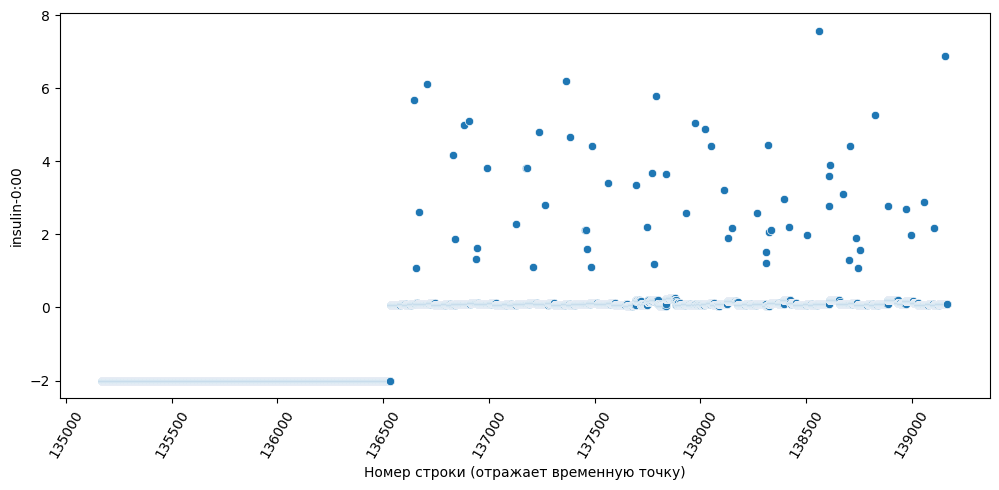

In [40]:
sample_ins = df[['p_num'] +
                ins][df['p_num'] == 'p11']['insulin-0:00'].to_frame().fillna(
                    -2).iloc[8000:12000, :]
plt.figure(figsize=(12, 5))
sns.scatterplot(sample_ins, x=sample_ins.index, y='insulin-0:00')
plt.xlabel('Номер строки (отражает временную точку)')
plt.xticks(rotation=60);

В колонках insulin достаточно много очень больших значений, на два порядка превышающих большинство значений, причем распределены они досатотчно равномерно по времени и по пациентам(вероятно, это моменты времени, соответствующие введению инсулина, поэтому нельзя их рассматривать как выбросы). Чтобы не смещаться под эти значения, пропуски в колонках с инсулином лучше заполнить медианой по каждому пациенту, без учета локального контекста(то есть без rolling median):

In [41]:
df_clean[ins].isna().sum()

insulin-5:55    9446
insulin-5:50    9445
insulin-5:45    9444
insulin-5:40    9443
insulin-5:35    9442
                ... 
insulin-0:20    9379
insulin-0:15    9378
insulin-0:10    9377
insulin-0:05    9376
insulin-0:00    9375
Length: 72, dtype: int64

In [42]:
for col in ins:
    df_clean[col] = df_clean.groupby('p_num')[col].transform(
        lambda x: x.fillna(x.median()))

**Колонки cals**

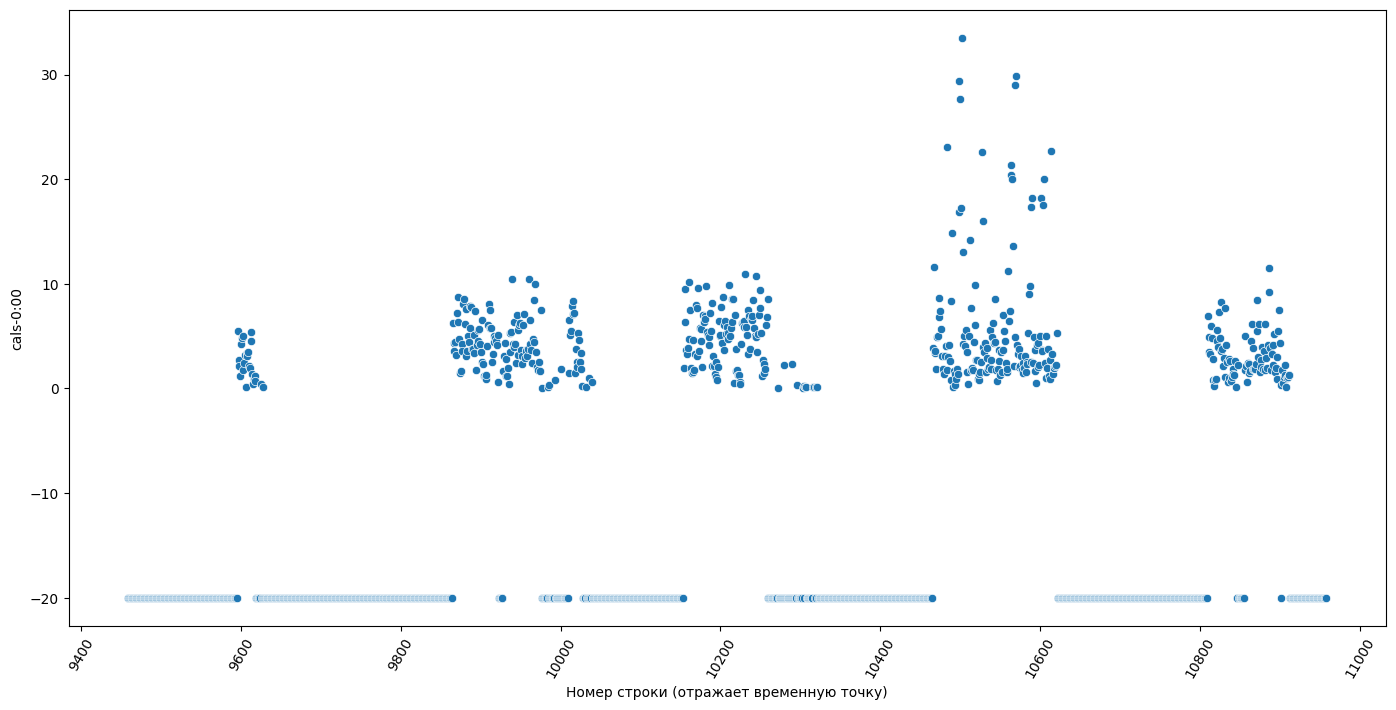

In [43]:
sample_cals = df[['p_num'] +
                 cals][df['p_num'] == 'p02']['cals-0:00'].to_frame().fillna(
                     -20).iloc[1000:2500, :]
plt.figure(figsize=(17, 8))
sns.scatterplot(sample_cals, x=sample_cals.index, y='cals-0:00')
plt.xlabel('Номер строки (отражает временную точку)')
plt.xticks(rotation=60);

Аналогично колонкам hr и steps, заполняем пропуски медианой(с rolling window, если не много пропусков подряд, то есть если локальный контекст, и просто медианой по каждому пациенту оставшиеся пропуски):

In [44]:
df_clean[cals].isna().sum()

cals-5:55    35814
cals-5:50    35804
cals-5:45    35797
cals-5:40    35790
cals-5:35    35783
             ...  
cals-0:20    35292
cals-0:15    35283
cals-0:10    35273
cals-0:05    35263
cals-0:00    35257
Length: 72, dtype: int64

In [45]:
for col in cals:
    df_clean[col] = df_clean.groupby('p_num')[col].transform(
        lambda x: x.fillna(
            x.rolling(window=10, min_periods=1, center=True).median()))
    df_clean[col] = df_clean.groupby('p_num')[col].transform(
        lambda x: x.fillna(x.median()))

In [46]:
df_clean.isna().sum().sum() # пропусков больше нет

0

In [47]:
df_clean.head()

,id,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00,hour
0,p01_0,p01,7.826531,13.8,9.6,7.893227,13.4,9.7,10.15,12.8,...,5.49,5.49,5.68,5.49,5.49,5.68,5.49,5.49,13.4,6
1,p01_1,p01,7.826531,13.8,9.7,7.893227,13.4,9.2,10.15,12.8,...,5.49,5.49,5.68,5.49,5.49,5.68,5.49,5.49,12.8,6
2,p01_2,p01,7.826531,13.8,9.2,7.893227,13.4,8.7,10.15,12.8,...,5.49,5.49,5.68,5.49,5.49,5.68,5.49,5.49,15.5,7
3,p01_3,p01,7.826531,13.8,8.7,7.893227,13.4,8.4,10.15,12.8,...,5.49,5.49,5.68,5.49,5.49,5.68,5.49,5.49,14.8,7
4,p01_4,p01,7.826531,13.8,8.4,7.893227,13.4,8.1,10.15,12.8,...,5.49,5.49,5.68,5.49,5.49,5.68,5.49,5.49,12.7,7


# Гипотезы:
- Вероятно, значимым признаком является время суток (признак hour), учитывающий циркадные биоритмы
- признак p_num скорее всего имеет огромную значимость, так как распределения всех признаков отличаются по пациентам (но я не использовала этот признак в модели, так как в тестовую и обучающую выборки определяла разных пациентов)
- Самыми важными признаками скорее всего являются уровень глюкозы и инсулина, так как с физиологической точки зрения они напрямую влияют на уровень глюкозы в будущем.
- Чем ближе к моменту предсказания признак, тем он более значим(уровень глюкозы 5 часов назад должен оказывать меньше влияния на уровень глюкозы через час в будущем, чем уровень глюкозы 10 минут назад)

In [48]:
# переведем числа из формата float64 в float32 для экономии памяти

float64_cols = df_clean.select_dtypes(include='float64').columns.to_list()
df_clean[float64_cols] = df_clean[float64_cols].astype('float32')

In [53]:
# сохраним предобработанные данные
df_clean.to_csv('./data/data_clean.csv', index=False)